<a href="https://colab.research.google.com/github/zeynepzor1/Health-Odyssey/blob/main/CS210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


file_path = '/content/MyHealthData_output.xlsx'
df = pd.read_excel(file_path)


print(df.head())


                creationDate                  startDate  \
0  2021-08-01 10:13:03 +0300  2021-08-01 09:52:16 +0300   
1  2021-08-01 12:03:10 +0300  2021-08-01 11:51:30 +0300   
2  2021-08-01 12:29:47 +0300  2021-08-01 12:18:44 +0300   
3  2021-08-01 12:55:01 +0300  2021-08-01 12:43:58 +0300   
4  2021-08-01 13:19:44 +0300  2021-08-01 13:08:41 +0300   

                     endDate  value                               type  
0  2021-08-01 09:52:18 +0300    9.0  HKQuantityTypeIdentifierStepCount  
1  2021-08-01 11:51:32 +0300    8.0  HKQuantityTypeIdentifierStepCount  
2  2021-08-01 12:18:47 +0300   16.0  HKQuantityTypeIdentifierStepCount  
3  2021-08-01 12:44:01 +0300   14.0  HKQuantityTypeIdentifierStepCount  
4  2021-08-01 13:08:44 +0300   17.0  HKQuantityTypeIdentifierStepCount  


In [24]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7436 entries, 0 to 7435
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   creationDate  7436 non-null   object 
 1   startDate     7436 non-null   object 
 2   endDate       7436 non-null   object 
 3   value         7436 non-null   float64
 4   type          7436 non-null   object 
dtypes: float64(1), object(4)
memory usage: 290.6+ KB


,value
count,7436.000000
mean,58.305659
std,138.490249
min,0.000490
25%,2.772000
50%,9.000000
75%,67.000000
max,1131.000000


<ipython-input-25-a27e4eaf1cc4>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='value', data=df, estimator='mean', ci=None, order=['August', 'September', 'October'])


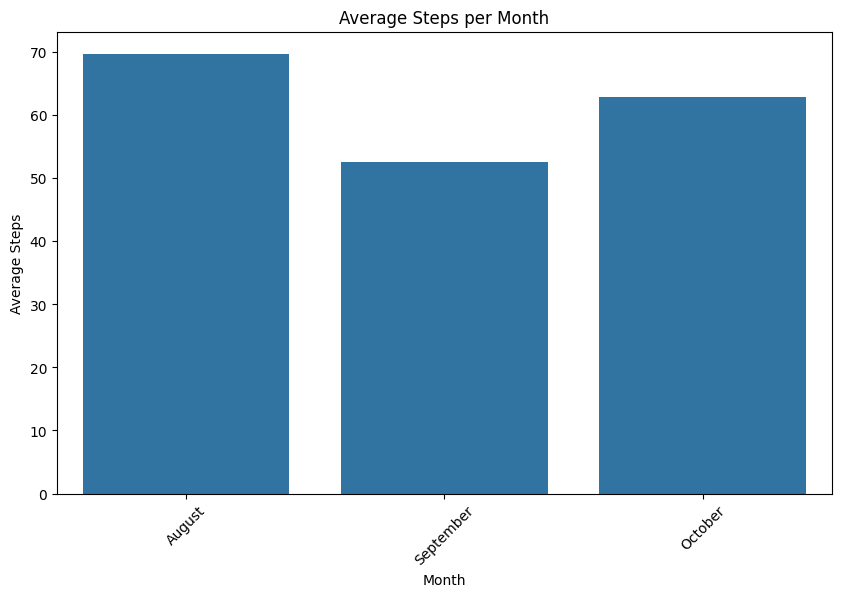

In [25]:

df['creationDate'] = pd.to_datetime(df['creationDate'])


df['month'] = df['creationDate'].dt.month_name()


plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='value', data=df, estimator='mean', ci=None, order=['August', 'September', 'October'])
plt.title('Average Steps per Month')
plt.xlabel('Month')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.show()


<ipython-input-64-dc646053ec7c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distance['Distance_km'] = df_distance['value'] / 1000.0  # m'den km'ye çevir
<ipython-input-64-dc646053ec7c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_step_length['StepLength_cm'] = df_step_length['value']  # cm olarak bırak
<ipython-input-64-dc646053ec7c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

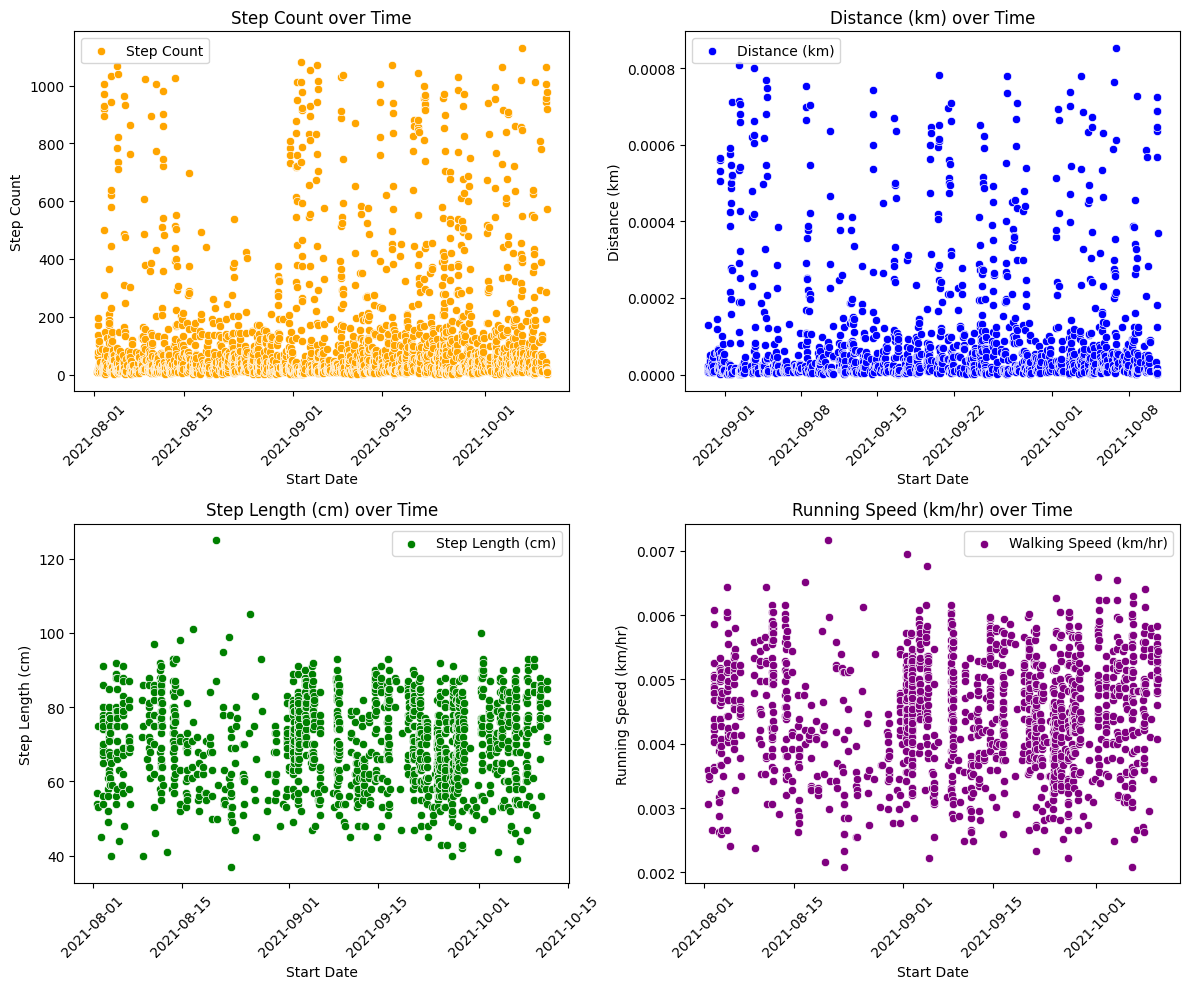

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns


df['startDate'] = pd.to_datetime(df['startDate'])


df_step_count = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']


df_distance = df[df['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning']
df_distance['Distance_km'] = df_distance['value'] / 1000.0


df_step_length = df[df['type'] == 'HKQuantityTypeIdentifierWalkingStepLength']

df_running_speed = df[df['type'] == 'HKQuantityTypeIdentifierRunningSpeed']
df_running_speed['RunningSpeed_km_hr'] = df_running_speed['value'].astype(float) * 0.000277778 * 3.6


if 'HKQuantityTypeIdentifierWalkingSpeed' in df['type'].values:
    df_walking_speed = df[df['type'] == 'HKQuantityTypeIdentifierWalkingSpeed']
    df_walking_speed['WalkingSpeed_km_hr'] = df_walking_speed['value'].astype(float) * 0.000277778 * 3.6
else:
    df_walking_speed = pd.DataFrame(columns=['startDate', 'WalkingSpeed_km_hr'])


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='startDate', y='value', data=df_step_count, label='Step Count', color='orange')
plt.title('Step Count over Time')
plt.xlabel('Start Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.scatterplot(x='startDate', y='Distance_km', data=df_distance, label='Distance (km)', color='blue')
plt.title('Distance (km) over Time')
plt.xlabel('Start Date')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45)


plt.subplot(2, 2, 3)
sns.scatterplot(x='startDate', y='StepLength_cm', data=df_step_length, label='Step Length (cm)', color='green')
plt.title('Step Length (cm) over Time')
plt.xlabel('Start Date')
plt.ylabel('Step Length (cm)')
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
sns.scatterplot(x='startDate', y='RunningSpeed_km_hr', data=df_running_speed, label='Running Speed (km/hr)', color='red')
plt.title('Running Speed (km/hr) over Time')
plt.xlabel('Start Date')
plt.ylabel('Running Speed (km/hr)')
plt.xticks(rotation=45)

if not df_walking_speed.empty:
    sns.scatterplot(x='startDate', y='WalkingSpeed_km_hr', data=df_walking_speed, label='Walking Speed (km/hr)', color='purple')

plt.tight_layout()
plt.legend()
plt.show()





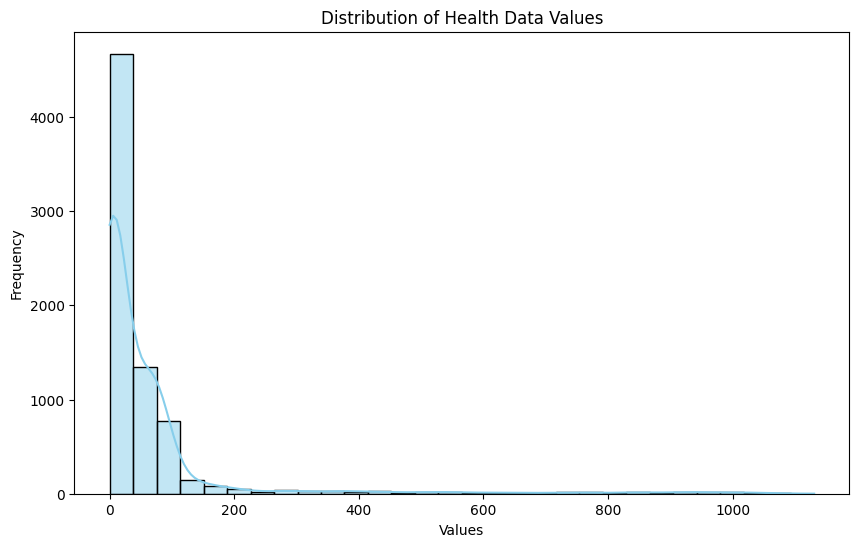

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Health Data Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()



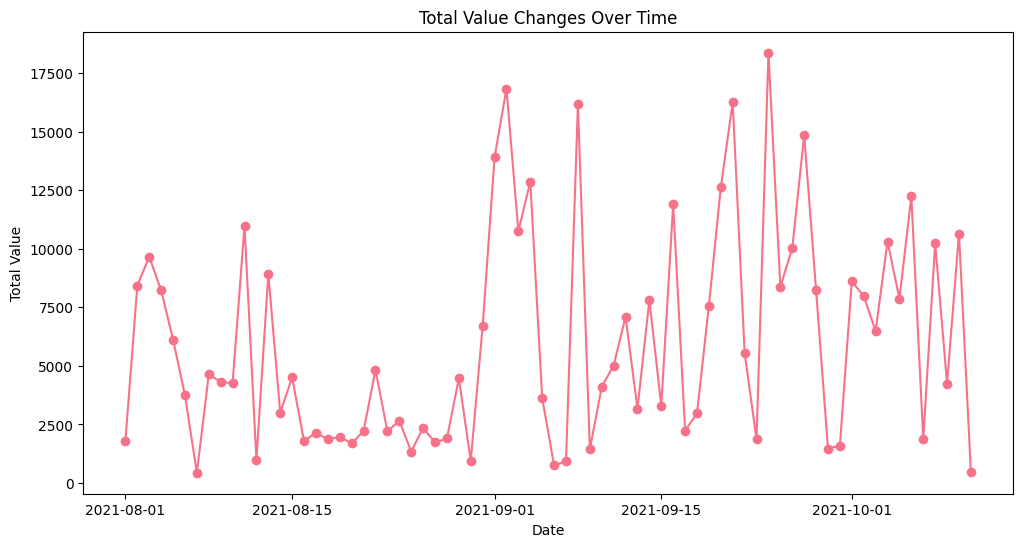

In [66]:

df['startDate'] = pd.to_datetime(df['startDate'])
plt.figure(figsize=(12, 6))
df.groupby(df['startDate'].dt.date)['value'].sum().plot(marker='o')
plt.title('Total Value Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.show()



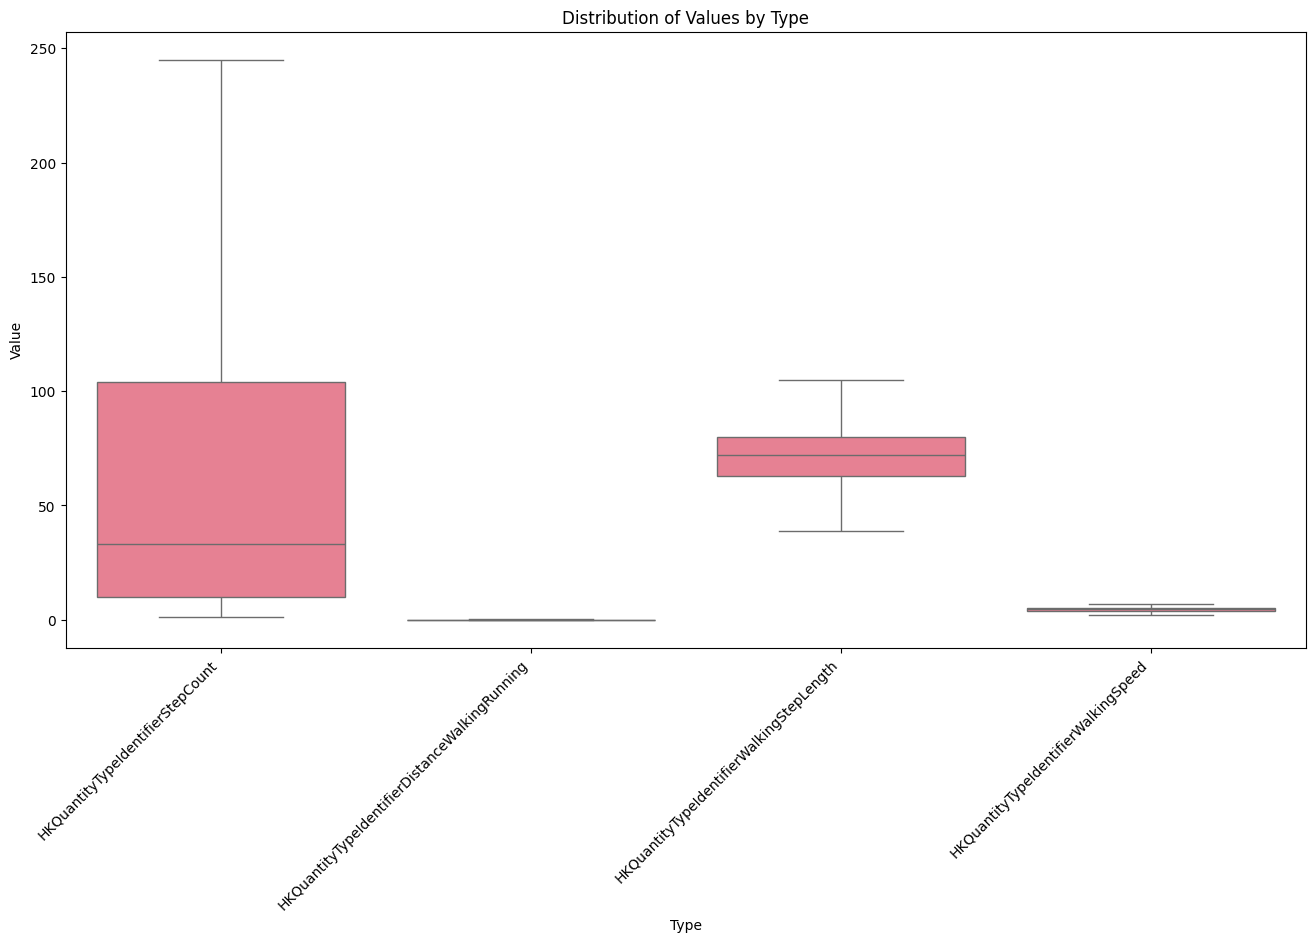

In [68]:

plt.figure(figsize=(16, 8))
sns.boxplot(x='type', y='value', data=df, showfliers=False)
plt.title('Distribution of Values by Type')
plt.xlabel('Type')
plt.ylabel('Value')
plt.xticks(rotation=45, ha="right")
plt.show()




In [72]:
unique_types = df['type'].unique()
print(unique_types)


['HKQuantityTypeIdentifierStepCount'
 'HKQuantityTypeIdentifierDistanceWalkingRunning'
 'HKQuantityTypeIdentifierWalkingStepLength'
 'HKQuantityTypeIdentifierWalkingSpeed']


In [73]:

month_names = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for data_type in df['type'].unique():
    max_month = df[df['type'] == data_type].groupby(df['startDate'].dt.month)['value'].sum().idxmax()
    max_month_name = month_names[max_month]
    print(f"For {data_type}, the highest value occurred in {max_month_name}.")





For HKQuantityTypeIdentifierStepCount, the highest value occurred in September.
For HKQuantityTypeIdentifierDistanceWalkingRunning, the highest value occurred in September.
For HKQuantityTypeIdentifierWalkingStepLength, the highest value occurred in September.
For HKQuantityTypeIdentifierWalkingSpeed, the highest value occurred in September.


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes


diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2952.0105887640448


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df['startDate'] = pd.to_datetime(df['startDate'])


df['startDate_numeric'] = df['startDate'].astype(int)

X = df[['startDate_numeric']]
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r2}")



R-Squared Score: -0.0016253554881013876


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

np.random.seed(42)
data = {
    'startDate': pd.date_range(start='2022-01-01', end='2022-01-31', freq='D'),
    'value': np.random.rand(31) * 100
}

df = pd.DataFrame(data)
df['startDate'] = pd.to_datetime(df['startDate'])

df['startDate_numeric'] = df['startDate'].astype(int)

X = df[['startDate_numeric']]
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor()


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting - R-Squared Score: {r2}")
print("En İyi Hyperparameter'lar:", best_params)



Gradient Boosting - R-Squared Score: 0.18338328380573254
En İyi Hyperparameter'lar: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [22]:
from scipy.stats import ttest_ind


before_data = df[df['startDate'] == 'Before University']['value']
after_data = df[df['startDate'] == 'Starting Sabancı University']['value']


t_stat, p_value = ttest_ind(before_data, after_data, nan_policy='omit')


alpha = 0.05


if not np.isnan(p_value) and p_value < alpha:
    print("Null Hypothesis rejected. Starting Sabancı University positively affected health.")
else:
    print("Null Hypothesis not rejected. No significant evidence that Starting Sabancı University positively affected health.")




Null Hypothesis not rejected. No significant evidence that Starting Sabancı University positively affected health.
